In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yfin
import MH4518.WY.Utils.constants as cs
import MH4518.WY.Utils.Dates as dates 
import MH4518.WY.Utils.payoff as pf
import MH4518.WY.Utils.GBM as gbm
import MH4518.WY.Utils.ProductPrice as pp 

%reload_ext autoreload
%autoreload 2



In [2]:


def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()

data




[*********************100%***********************]  2 of 2 completed


Ticker,LONN.SW,SIKA.SW
Date,,
2023-04-27,542.120544,237.429871
2023-04-28,546.263306,242.368103
2023-05-02,545.868835,239.800232
2023-05-03,574.079590,241.479218
2023-05-04,572.895935,242.071823
...,...,...
2024-07-24,522.599976,262.000000
2024-07-25,559.799988,258.500000
2024-07-26,581.000000,262.000000


In [3]:
params_product = {
    'Denomination': 1000,
    'Coupon_Rate': (0.08 / 4) ,  # Quarterly coupon payments
}

In [4]:
Tlist = dates.num_business_days(cs.initial_fixing_date, cs.final_fixing_date)
present_value_list = []
indexlist = []

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import multiprocessing as mp
import pandas as pd

# Assuming 'dates', 'gbm', 'cs', 'data', 'pf', and 'params_product' are already imported or defined

def process_fdos(args):
    fdos, data_slice = args
    try:
        print(f"Processing FDOS: {fdos}")
        # Run the simulation
        sim_T = gbm.multi_asset_gbm_n_sims(plot=False, plotasset=False, nsims=10, data=data_slice, fdos=fdos)
        # Extract asset paths
        lonza_path = sim_T['LONN.SW']
        sika_path = sim_T['SIKA.SW']
        # Calculate payoffs
        payoff_T = pf.payoff(lonza_path, sika_path, params_product, fdos)
        # Compute expected payoff
        expected_payoff = np.mean(payoff_T)
        # Discount to present value (assuming present value as of fdos)
        r = cs.interest_rate
        T_discount = dates.num_business_days(fdos, cs.final_fixing_date) / 252
        present_value = expected_payoff * np.exp(-r * T_discount)
        return present_value
    except Exception as e:
        print(f"Error processing FDOS {fdos}: {e}")
        return None  # or some default value


if __name__ == '__main__':
    date_list = dates.get_list_dates(cs.initial_fixing_date, cs.final_fixing_date)
    date_list = pd.Series(date_list).tolist()
    date_list = date_list[:10]  # Uncomment to limit the number of dates for testing

    T = date_list

    # Prepare arguments for multiprocessing
    # If 'data' is large, you can slice it or load it within the function
    data_slices = [data for _ in T]  # Assuming 'data' is the same for all dates

    # Combine the dates and data slices into a list of tuples
    args_list = list(zip(T, data_slices))

    # Set up the multiprocessing pool
    num_processes = mp.cpu_count()  # You can adjust this number
    with mp.Pool(processes=num_processes) as pool:
        # Map the function to the arguments
        present_value_list = pool.map(process_fdos, args_list)

    # Now 'present_value_list' contains the results
    # You can proceed to process or store these results as needed




In [ ]:
productprice = pp.get_product_price()
productprice



date
2023-04-28    974.0
2023-05-02    972.7
2023-05-03    980.9
2023-05-04    985.1
2023-05-05    988.2
              ...  
2024-07-24    940.1
2024-07-25    985.6
2024-07-26    991.5
2024-07-29    991.1
2024-07-30    990.9
Name: value, Length: 309, dtype: float64

<Axes: xlabel='date'>

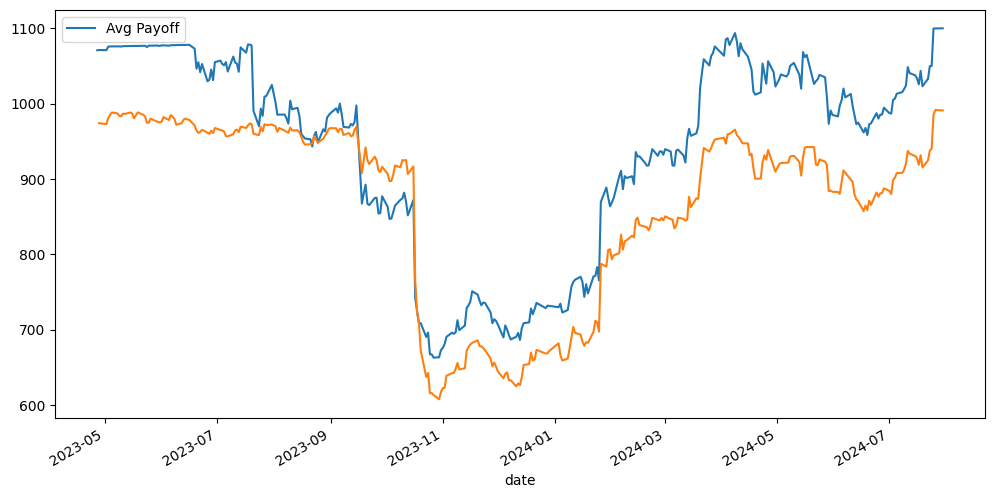

In [ ]:
n=fig, ax = plt.subplots(figsize=(12, 6))
present_value_df = pd.DataFrame({'Avg Payoff': present_value_list}, index=T)
present_value_df.plot(ax = ax)



productprice.plot(ax =ax)

In [14]:
import numpy as np
import pandas as pd
import MH4518.WY.Utils.ProductPrice as pp 
import matplotlib.pyplot as plt

In [15]:
present = [np.float64(1068.037361090569), np.float64(1071.6624346517951), np.float64(1070.7875223942058), np.float64(1075.4982628174937), np.float64(1075.5011643016444), np.float64(1075.8355282818409), np.float64(1075.89674771835), np.float64(1075.2493267413615), np.float64(1075.6954159318482), np.float64(1076.1430197589402), np.float64(1076.2206092781048), np.float64(1076.3599389222716), np.float64(1076.4177337580156), np.float64(1076.142699945037), np.float64(1076.5411999124897), np.float64(1076.6104742625146), np.float64(1076.7441111436906), np.float64(1076.2441860724434), np.float64(1076.4496540805603), np.float64(1076.8910995727758), np.float64(1076.4823536306744), np.float64(1076.9195788669083), np.float64(1077.1006129876882), np.float64(1077.294261157763), np.float64(1077.32531025735), np.float64(1077.4486595272479), np.float64(1077.5231140177157), np.float64(1077.5739699983137), np.float64(1076.8913038977216), np.float64(1076.9538858327476), np.float64(1077.387377671585), np.float64(1077.6203073488084), np.float64(1077.290634337186), np.float64(1077.7330162910753), np.float64(1072.9122812821272), np.float64(1055.5012758127045), np.float64(1049.1463636873743), np.float64(1048.163822661562), np.float64(1052.847839920097), np.float64(1040.2201330469966), np.float64(1028.8221045467267), np.float64(1051.5035655856655), np.float64(1041.9369968677704), np.float64(1058.0199040559178), np.float64(1052.4090214461912), np.float64(1055.4751995881254), np.float64(1055.1752322169878), np.float64(1051.7680401141474), np.float64(1043.924988596581), np.float64(1051.5606607440598), np.float64(1053.490691556356), np.float64(1058.6813890563128), np.float64(1055.3222169901098), np.float64(1071.151075507756), np.float64(1068.0846388025766), np.float64(1075.9949035248076), np.float64(1076.2552946996086), np.float64(1077.1410752916872), np.float64(983.798640555259), np.float64(975.4402814325051), np.float64(994.0799186795809), np.float64(984.3940407125624), np.float64(1002.8281038367987), np.float64(1009.6161611396914), np.float64(1011.2189508668821), np.float64(997.6837555224038), np.float64(983.6089866560392), np.float64(987.8101631719759), np.float64(983.3458150917827), np.float64(984.7309951295001), np.float64(980.8035887745185), np.float64(996.4951297899569), np.float64(991.604666677334), np.float64(991.2740413243378), np.float64(980.7584282534408), np.float64(965.3731775641286), np.float64(953.9985691428304), np.float64(951.0583732283359), np.float64(947.6650135314517), np.float64(945.7535402597922), np.float64(965.6072244924499), np.float64(960.5835175102959), np.float64(954.3148694369632), np.float64(956.5863397358155), np.float64(965.209856314558), np.float64(971.2388861851739), np.float64(979.9687004057104), np.float64(987.0142569969594), np.float64(992.918867506922), np.float64(990.9048960373079), np.float64(994.4816904989011), np.float64(988.2387632323724), np.float64(971.7226633264996), np.float64(977.6298380027182), np.float64(973.8701839375377), np.float64(976.4755726567513), np.float64(982.9608389813037), np.float64(996.9065827083266), np.float64(865.8028061563145), np.float64(874.481034916777), np.float64(895.1956360453108), np.float64(868.3790690748441), np.float64(868.3270169036697), np.float64(879.3107979658361), np.float64(879.5759291633373), np.float64(860.6086185924715), np.float64(860.0712975603731), np.float64(868.2563500446231), np.float64(857.0482781759621), np.float64(849.0269998124211), np.float64(850.8057749663434), np.float64(857.0140615513141), np.float64(873.3457192282432), np.float64(873.7390660625356), np.float64(883.0541947535012), np.float64(879.3495492123735), np.float64(877.2812129606737), np.float64(853.7276429335602), np.float64(868.2328539057507), np.float64(744.2261374949532), np.float64(720.4334642684626), np.float64(716.1313784048882), np.float64(699.6569241844567), np.float64(690.262854819875), np.float64(696.7733237621079), np.float64(667.465859861194), np.float64(669.4396829272843), np.float64(666.4193686872683), np.float64(661.150988738822), np.float64(670.6329870666951), np.float64(674.2452891419535), np.float64(676.5246135949253), np.float64(692.8355331741436), np.float64(697.1439572116356), np.float64(697.0595310385244), np.float64(702.3693047643766), np.float64(712.0611026410761), np.float64(702.7292124323886), np.float64(704.7258530574443), np.float64(728.6061410420601), np.float64(732.8436542087028), np.float64(736.47512833298), np.float64(739.7259087974337), np.float64(743.486513465301), np.float64(735.7852318502888), np.float64(735.3498784169902), np.float64(733.800630141456), np.float64(732.2825159434788), np.float64(721.0959820849743), np.float64(711.2534026937695), np.float64(715.7758731113535), np.float64(709.5117786298276), np.float64(703.1158826454606), np.float64(695.1923521407714), np.float64(701.5728729388935), np.float64(703.1889365007562), np.float64(691.8368237570692), np.float64(693.3179700300791), np.float64(686.3328038164569), np.float64(690.1479473808487), np.float64(687.4304069159925), np.float64(698.1209815143059), np.float64(714.9684195300163), np.float64(717.1587497889072), np.float64(732.5590430483966), np.float64(722.9537821453106), np.float64(723.8310401505862), np.float64(736.8069974578681), np.float64(733.5746312366646), np.float64(733.9884430080685), np.float64(730.945671776502), np.float64(731.5348394776497), np.float64(719.0469432935434), np.float64(728.1804342253673), np.float64(742.5222750767269), np.float64(756.6458451316478), np.float64(765.4714130648811), np.float64(764.7001128431341), np.float64(768.1137339458248), np.float64(766.4220965232582), np.float64(747.283117892595), np.float64(756.6749143940999), np.float64(751.2775201846061), np.float64(771.9884009736608), np.float64(774.0210992763698), np.float64(787.9554927709383), np.float64(767.6201238203514), np.float64(863.7083052750882), np.float64(883.8133273937983), np.float64(879.460685292928), np.float64(866.4090940707238), np.float64(871.1419972680916), np.float64(876.364652123786), np.float64(900.9596605196539), np.float64(907.3270389545694), np.float64(887.5267063228896), np.float64(903.9195675447143), np.float64(901.9690058138249), np.float64(906.1725649081634), np.float64(896.777853833964), np.float64(934.5911845628902), np.float64(927.312199808448), np.float64(924.5349495337405), np.float64(923.084907530477), np.float64(919.2673276937949), np.float64(918.7106632044005), np.float64(928.7126371306105), np.float64(936.1154454460509), np.float64(933.2957527241215), np.float64(936.5513475905937), np.float64(937.409277994196), np.float64(933.7764960384208), np.float64(940.1707011260015), np.float64(936.2192270065924), np.float64(921.5043653308634), np.float64(919.0841026413002), np.float64(940.5606738095203), np.float64(938.5590534714759), np.float64(925.9762778695209), np.float64(926.9081026488591), np.float64(950.8399735244036), np.float64(972.134972689243), np.float64(955.3744069657604), np.float64(963.3918474778172), np.float64(969.5222276270616), np.float64(1019.6527668231715), np.float64(1044.3981091554547), np.float64(1056.1734637630757), np.float64(1050.1836161412714), np.float64(1063.0854542236073), np.float64(1065.42834376877), np.float64(1074.9344033981313), np.float64(1061.9183131366303), np.float64(1080.2302537272292), np.float64(1087.2770848893638), np.float64(1084.5509347669952), np.float64(1092.4386855142764), np.float64(1082.2441291379666), np.float64(1066.5366715365458), np.float64(1073.8205449956188), np.float64(1065.051165256271), np.float64(1063.5031100595227), np.float64(1049.5314200291702), np.float64(1042.6069317809458), np.float64(1020.7252171422201), np.float64(1007.584849591185), np.float64(1015.0201176814119), np.float64(1049.984778074369), np.float64(1044.1003796422872), np.float64(1027.2987753044183), np.float64(1052.74031049166), np.float64(1042.6876521399718), np.float64(1020.8580658477256), np.float64(1027.9687652611042), np.float64(1037.5331916240334), np.float64(1036.2070687994271), np.float64(1038.511497440427), np.float64(1050.4549337013846), np.float64(1049.9281201779033), np.float64(1039.5668588307424), np.float64(1022.7132624421098), np.float64(1067.665880211992), np.float64(1059.2437187537632), np.float64(1062.0168351747452), np.float64(1023.3785069027444), np.float64(1028.802018462582), np.float64(1030.9382737930637), np.float64(1037.399219730666), np.float64(1032.6715168914063), np.float64(1001.0621202506151), np.float64(977.1425516244816), np.float64(988.7782701476884), np.float64(984.8800233380392), np.float64(981.6402344414846), np.float64(995.8631935983918), np.float64(1007.6810160182289), np.float64(1021.2115481132886), np.float64(1009.7162563762796), np.float64(1011.5216322980148), np.float64(1000.4549818884252), np.float64(982.5937276339903), np.float64(975.3166776076163), np.float64(973.796381719869), np.float64(959.9360017971081), np.float64(967.5820810385547), np.float64(961.2118320328494), np.float64(974.3601528505714), np.float64(967.6817101592911), np.float64(986.2829196418371), np.float64(979.75606433116), np.float64(984.5015353011443), np.float64(985.3839565233635), np.float64(991.9853297864673), np.float64(988.5196544800364), np.float64(984.8478649595804), np.float64(1004.0276620823805), np.float64(1007.400480663313), np.float64(1013.5305890287192), np.float64(1014.2109255397789), np.float64(1017.8108587074164), np.float64(1027.9134094637973), np.float64(1046.8354211910416), np.float64(1042.306503070033), np.float64(1039.156293409118), np.float64(1035.7053674795247), np.float64(1026.4278656696533), np.float64(1041.8632182438637), np.float64(1023.1277651244789), np.float64(1033.5889115904674), np.float64(1048.6466929132298), np.float64(1050.7428770327267), np.float64(1099.6857591793978), np.float64(1099.764310967584), np.float64(1099.8428683668126), np.float64(1099.9214313774842)]

In [19]:
pd.Series(present)

0      1068.037361
1      1071.662435
2      1070.787522
3      1075.498263
4      1075.501164
          ...     
310    1050.742877
311    1099.685759
312    1099.764311
313    1099.842868
314    1099.921431
Length: 315, dtype: float64

In [ ]:
common_dates = prod

In [10]:
fig, ax = plt.subplot(figsize=(12, 6))
plt.plot(present, ax = ax)
productprice.plot(ax = ax)


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>